In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Загрузка данных
data = pd.read_csv('/content/drive/MyDrive/train.csv')
macro_data = pd.read_csv('/content/drive/MyDrive/macro.csv')  # переименовал переменную, так как data уже используется

# Предварительный обзор данных
print(data.head())
print(data.info())
print(data.describe())

# Визуализация данных
sns.pairplot(data)
plt.show()

# Подготовка данных
# Обработка пропущенных значений, кодирование категориальных признаков и т.д.

# Анализ корреляции
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Подготовка данных для обучения модели
X = data[['full_sq', 'num_room', 'build_year', 'state', 'metro_km_avto', 'metro_min_walk', 'park_km', 'green_zone_km', 'cafe_count_500', 'trc_count_500', 'school_km', 'kindergarten_km', 'public_healthcare_km', 'fitness_km', 'sport_count_500', 'oil_urals', 'gdp_quart', 'gdp_quart_growth', 'cpi', 'deposits_value', 'mortgage_value', 'unemployment', 'usdrub', 'eurrub']]
y = data['price_doc']  # заменил 'target' на 'price_doc', предполагая что это целевая переменная

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

   id   timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0   1  2011-08-20       43     27.0    4.0        NaN       NaN         NaN   
1   2  2011-08-23       34     19.0    3.0        NaN       NaN         NaN   
2   3  2011-08-27       43     29.0    2.0        NaN       NaN         NaN   
3   4  2011-09-01       89     50.0    9.0        NaN       NaN         NaN   
4   5  2011-09-05       77     77.0    4.0        NaN       NaN         NaN   

   num_room  kitch_sq  ...  cafe_count_5000_price_2500  \
0       NaN       NaN  ...                           9   
1       NaN       NaN  ...                          15   
2       NaN       NaN  ...                          10   
3       NaN       NaN  ...                          11   
4       NaN       NaN  ...                         319   

  cafe_count_5000_price_4000 cafe_count_5000_price_high  \
0                          4                          0   
1                          3                          0   

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7db565e1d000> (for post_execute):


ValueError: Image size of 69000x69000 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 69000x69000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 69000x69000 with 19691 Axes>

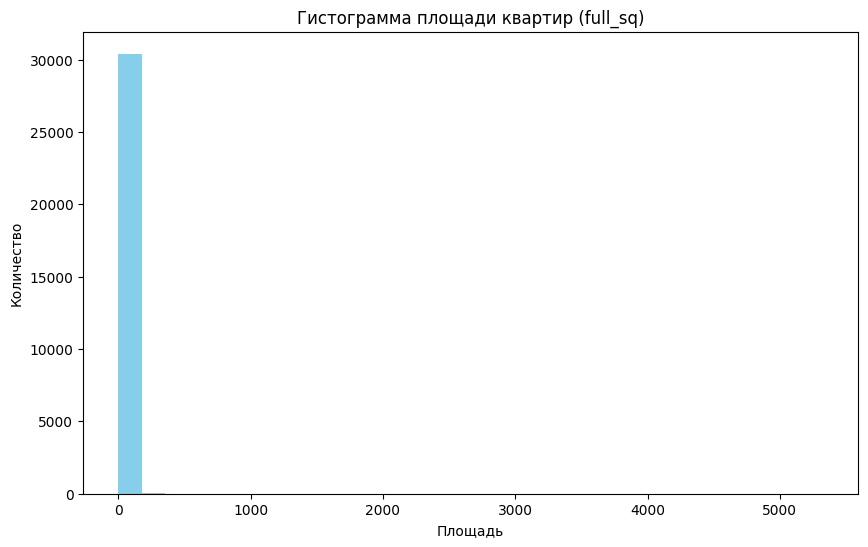

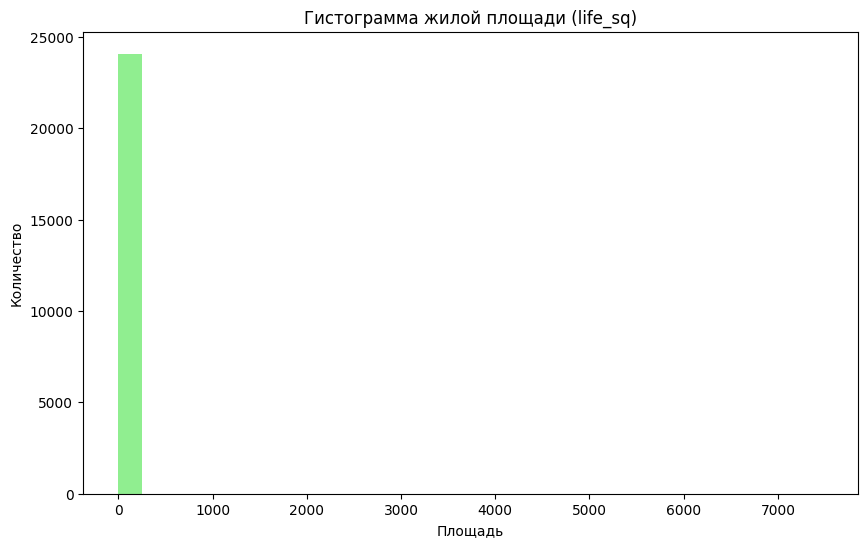

In [ ]:
import matplotlib.pyplot as plt

# Гистограмма для full_sq
plt.figure(figsize=(10, 6))
plt.hist(data['full_sq'], bins=30, color='skyblue')
plt.title('Гистограмма площади квартир (full_sq)')
plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.show()

# Гистограмма для life_sq
plt.figure(figsize=(10, 6))
plt.hist(data['life_sq'].dropna(), bins=30, color='lightgreen')
plt.title('Гистограмма жилой площади (life_sq)')
plt.xlabel('Площадь')
plt.ylabel('Количество')
plt.show()

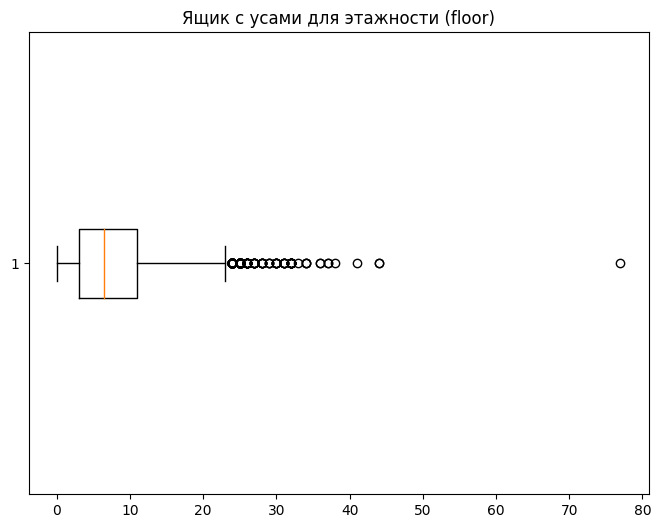

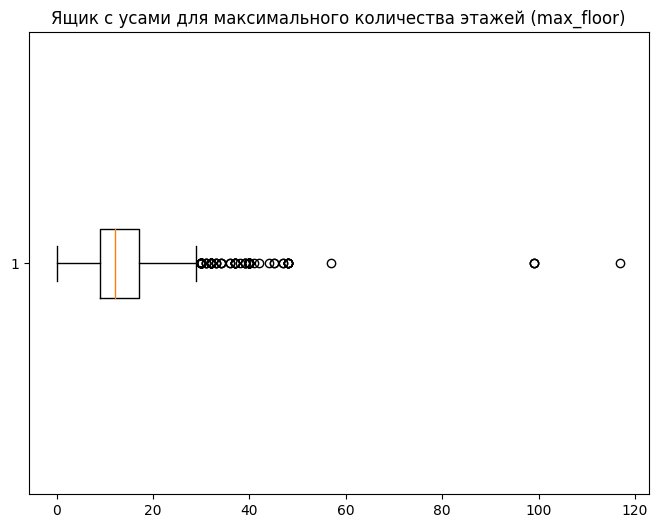

In [ ]:
# Ящик с усами для этажности
plt.figure(figsize=(8, 6))
plt.boxplot(data['floor'].dropna(), vert=False)
plt.title('Ящик с усами для этажности (floor)')
plt.show()

# Ящик с усами для максимального количества этажей
plt.figure(figsize=(8, 6))
plt.boxplot(data['max_floor'].dropna(), vert=False)
plt.title('Ящик с усами для максимального количества этажей (max_floor)')
plt.show()

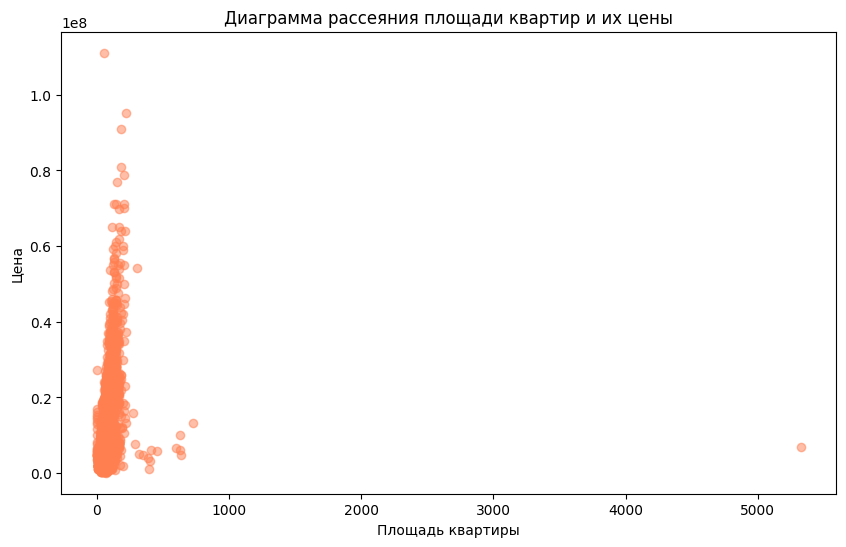

In [ ]:
# Диаграмма рассеяния для full_sq и price_doc
plt.figure(figsize=(10, 6))
plt.scatter(data['full_sq'], data['price_doc'], color='coral', alpha=0.5)
plt.title('Диаграмма рассеяния площади квартир и их цены')
plt.xlabel('Площадь квартиры')
plt.ylabel('Цена')
plt.show()

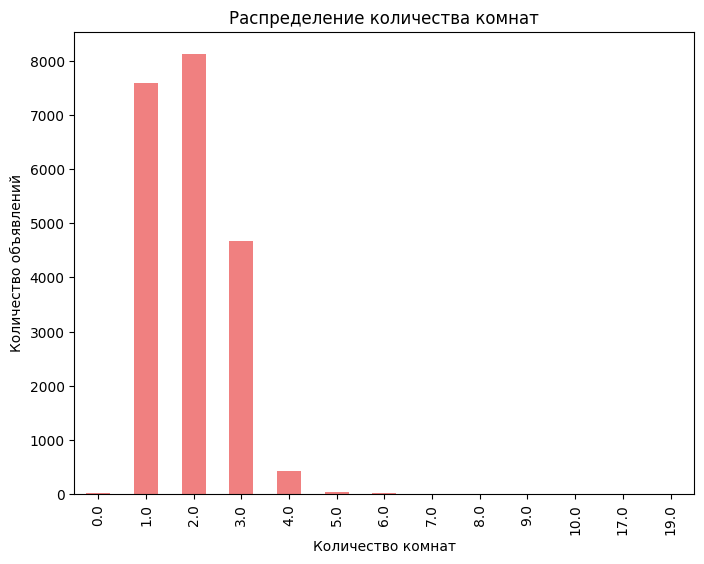

In [ ]:
# График распределения количества комнат
plt.figure(figsize=(8, 6))
room_counts = data['num_room'].value_counts()
room_counts = room_counts.sort_index()
room_counts.plot(kind='bar', color='lightcoral')
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

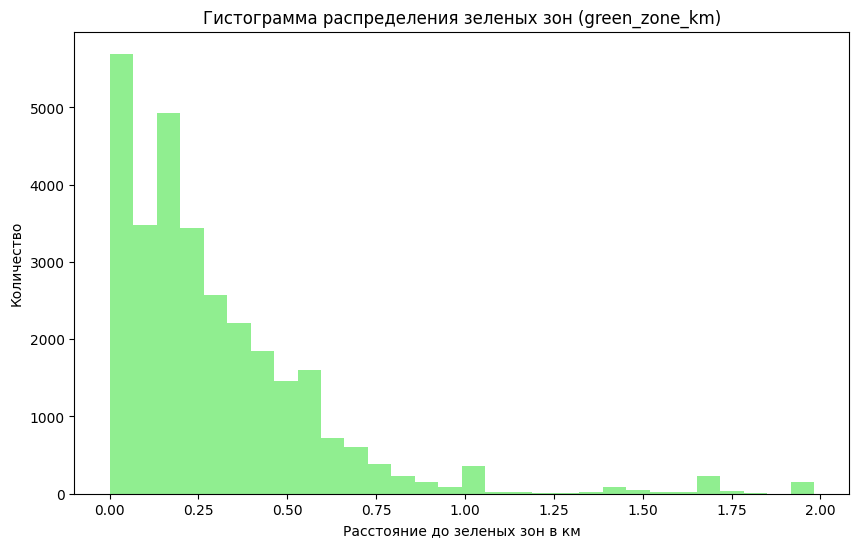

In [ ]:
# Гистограмма для распределения зеленых зон (green_zone_km)
plt.figure(figsize=(10, 6))
plt.hist(data['green_zone_km'].dropna(), bins=30, color='lightgreen')
plt.title('Гистограмма распределения зеленых зон (green_zone_km)')
plt.xlabel('Расстояние до зеленых зон в км')
plt.ylabel('Количество')
plt.show()

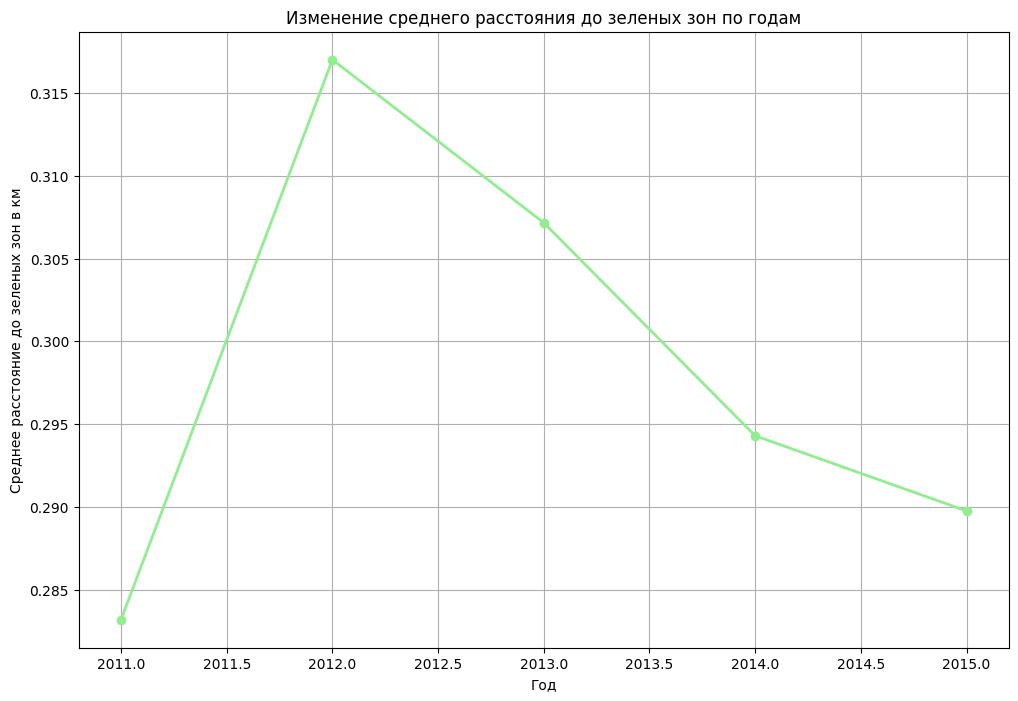

In [ ]:
# Преобразование столбца timestamp в формат даты
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Извлечение года из столбца timestamp
data['year'] = data['timestamp'].dt.year

# Группировка данных по годам и расчет среднего расстояния до зеленых зон
green_zone_yearly = data.groupby('year')['green_zone_km'].mean()

# График изменения среднего расстояния до зеленых зон по годам
plt.figure(figsize=(12, 8))
plt.plot(green_zone_yearly.index, green_zone_yearly.values, marker='o', color='lightgreen', linestyle='-', linewidth=2)
plt.title('Изменение среднего расстояния до зеленых зон по годам')
plt.xlabel('Год')
plt.ylabel('Среднее расстояние до зеленых зон в км')
plt.grid(True)
plt.show()

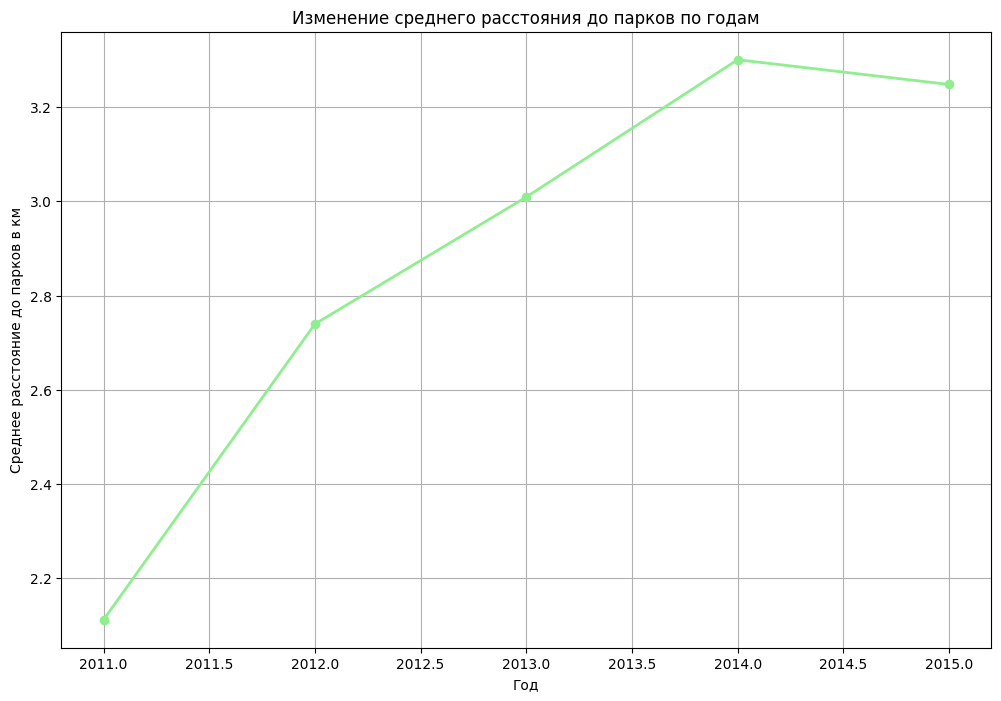

In [ ]:
# Преобразование столбца timestamp в формат даты
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Извлечение года из столбца timestamp
data['year'] = data['timestamp'].dt.year

# Группировка данных по годам и расчет среднего расстояния до парков
park_distance_yearly = data.groupby('year')['park_km'].mean()

# График изменения среднего расстояния до парков по годам
plt.figure(figsize=(12, 8))
plt.plot(park_distance_yearly.index, park_distance_yearly.values, marker='o', color='lightgreen', linestyle='-', linewidth=2)
plt.title('Изменение среднего расстояния до парков по годам')
plt.xlabel('Год')
plt.ylabel('Среднее расстояние до парков в км')
plt.grid(True)
plt.show()


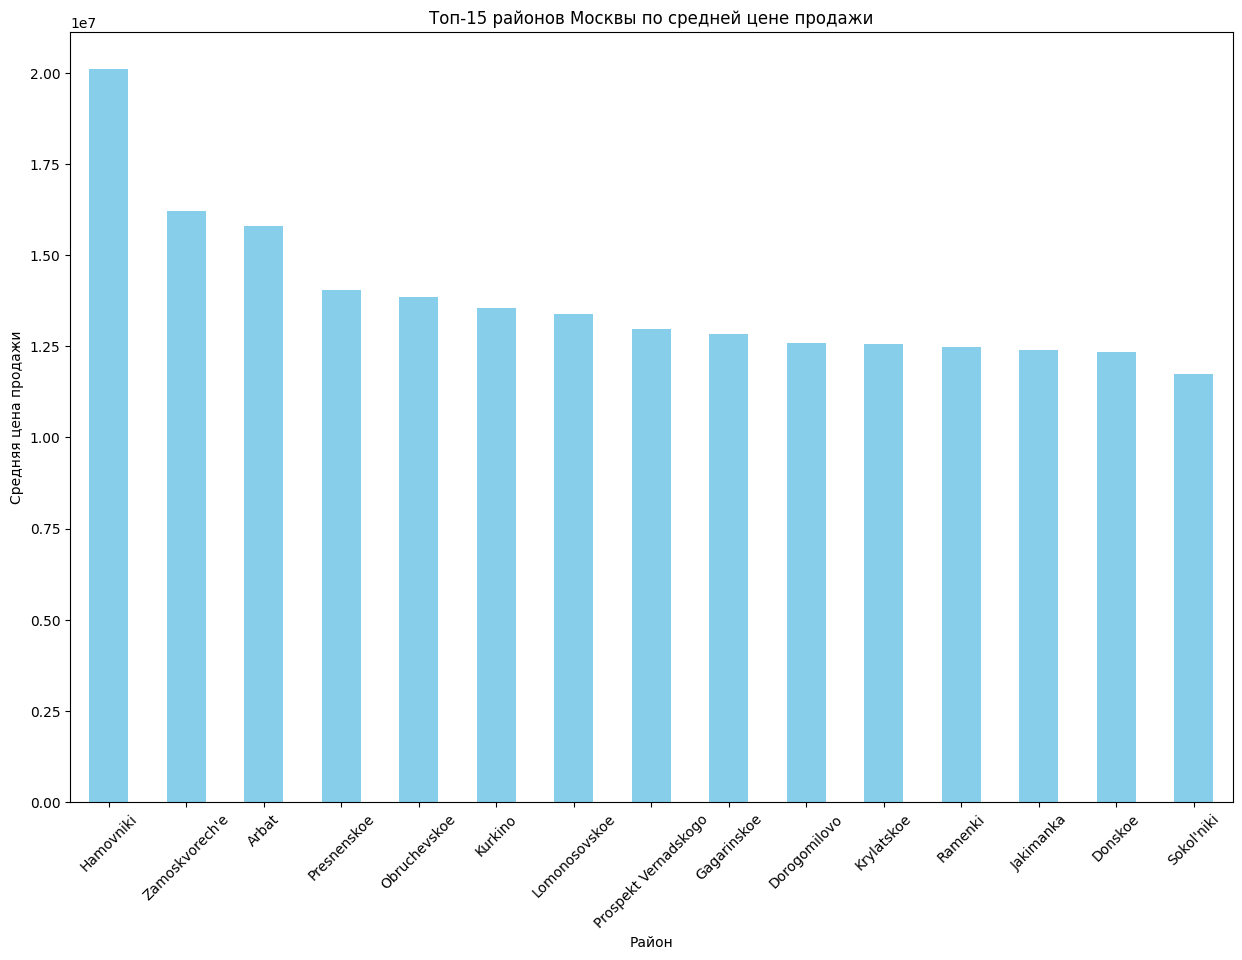

In [ ]:
# Группировка данных по районам и расчет средней цены продажи
top_15_areas_by_price = data.groupby('sub_area')['price_doc'].mean().sort_values(ascending=False).head(15)

# Создание графика средней цены продажи по топ-15 районам
plt.figure(figsize=(15, 10))
top_15_areas_by_price.plot(kind='bar', color='skyblue')
plt.title('Топ-15 районов Москвы по средней цене продажи')
plt.xlabel('Район')
plt.ylabel('Средняя цена продажи')
plt.xticks(rotation=45)
plt.show()


TypeError: float() argument must be a string or a real number, not 'Period'

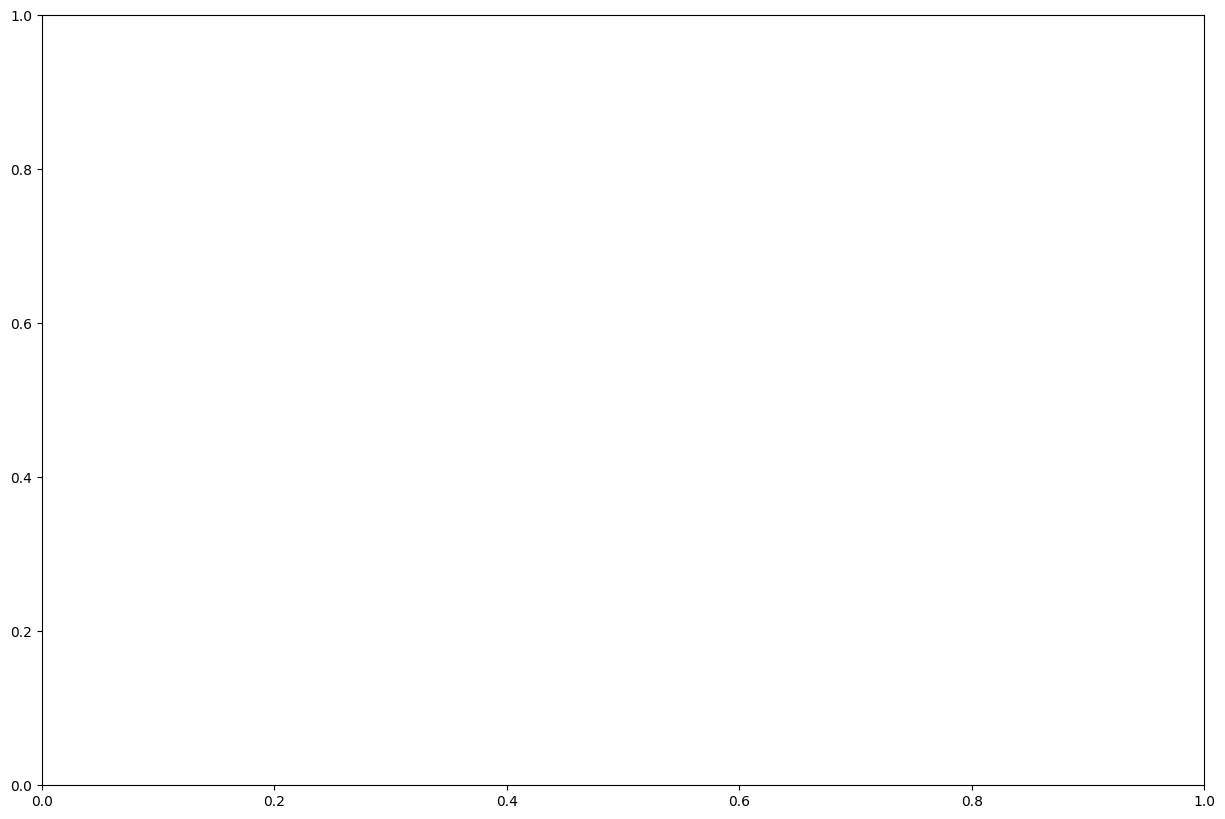

In [ ]:
# Фильтрация данных по району Хамовники
hamovniki_data = data[data['sub_area'] == 'Hamovniki']

# Преобразование столбца с датой в формат datetime, если он не был преобразован ранее
# data['timestamp'] = pd.to_datetime(data['timestamp'])

# Группировка данных по месяцам и расчет средней цены продажи
monthly_avg_price_hamovniki = hamovniki_data.groupby(hamovniki_data['timestamp'].dt.to_period('M')).agg({'price_doc': 'mean'})

# Создание графика роста цен в районе Хамовники по месяцам
plt.figure(figsize=(15, 10))
plt.plot(monthly_avg_price_hamovniki, marker='o', color='b')
plt.title('Рост цен в районе Хамовники по месяцам')
plt.xlabel('Дата')
plt.ylabel('Средняя цена продажи')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


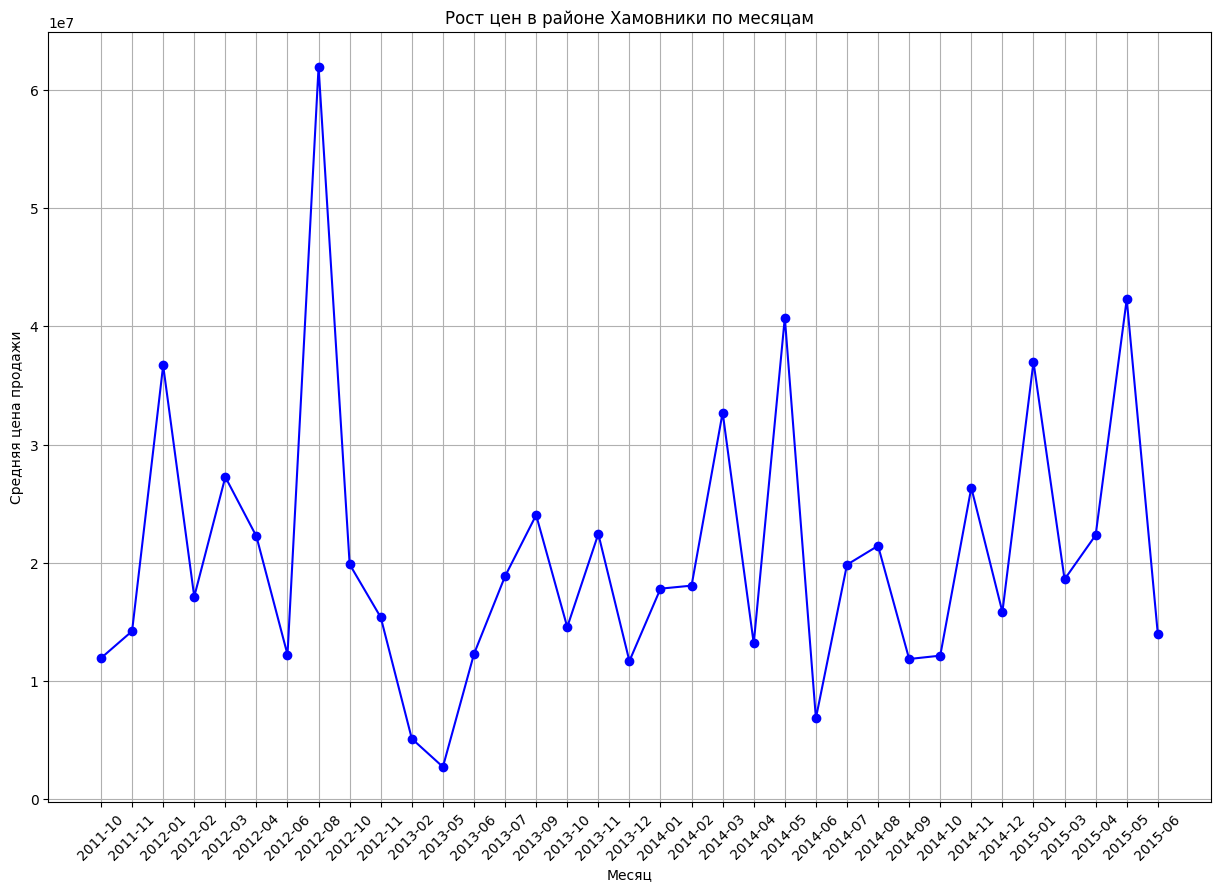

In [ ]:
# Фильтрация данных по району Хамовники
hamovniki_data = data[data['sub_area'] == 'Hamovniki']

# Преобразование столбца с датой в формат datetime, если он не был преобразован ранее
# data['timestamp'] = pd.to_datetime(data['timestamp'])

# Группировка данных по месяцам и расчет средней цены продажи
monthly_avg_price_hamovniki = hamovniki_data.groupby(hamovniki_data['timestamp'].dt.to_period('M')).agg({'price_doc': 'mean'})

# Создание графика роста цен в районе Хамовники по месяцам
plt.figure(figsize=(15, 10))
plt.plot(monthly_avg_price_hamovniki.index.astype(str), monthly_avg_price_hamovniki['price_doc'], marker='o', color='b')
plt.title('Рост цен в районе Хамовники по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена продажи')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


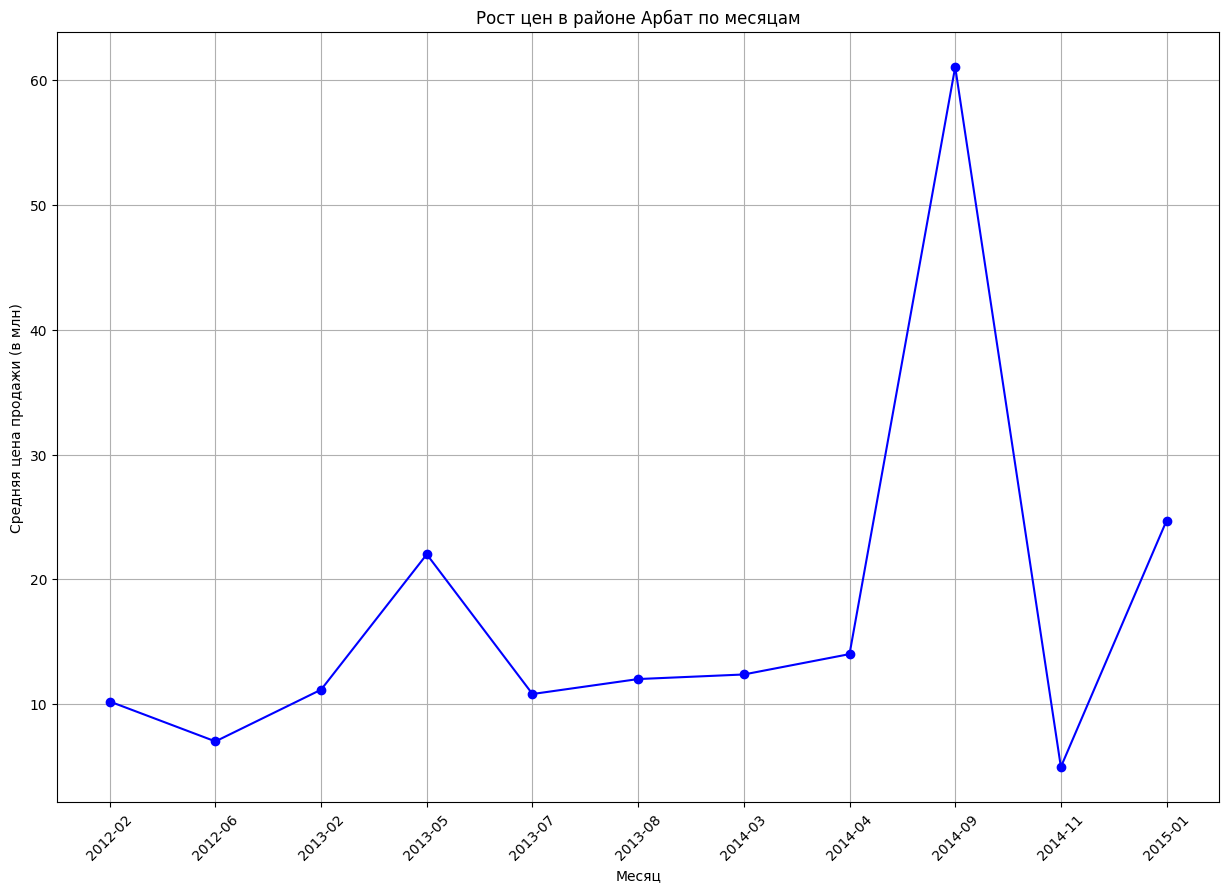

In [ ]:
# Фильтрация данных по району Арбат
arbat_data = data[data['sub_area'] == 'Arbat']

# Группировка данных по месяцам и расчет средней цены продажи
monthly_avg_price_arbat = arbat_data.groupby(arbat_data['timestamp'].dt.to_period('M')).agg({'price_doc': 'mean'})

# Создание графика роста цен в районе Арбат по месяцам
plt.figure(figsize=(15, 10))
plt.plot(monthly_avg_price_arbat.index.astype(str), monthly_avg_price_arbat['price_doc'] / 1000000, marker='o', color='b')
plt.title('Рост цен в районе Арбат по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена продажи (в млн)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


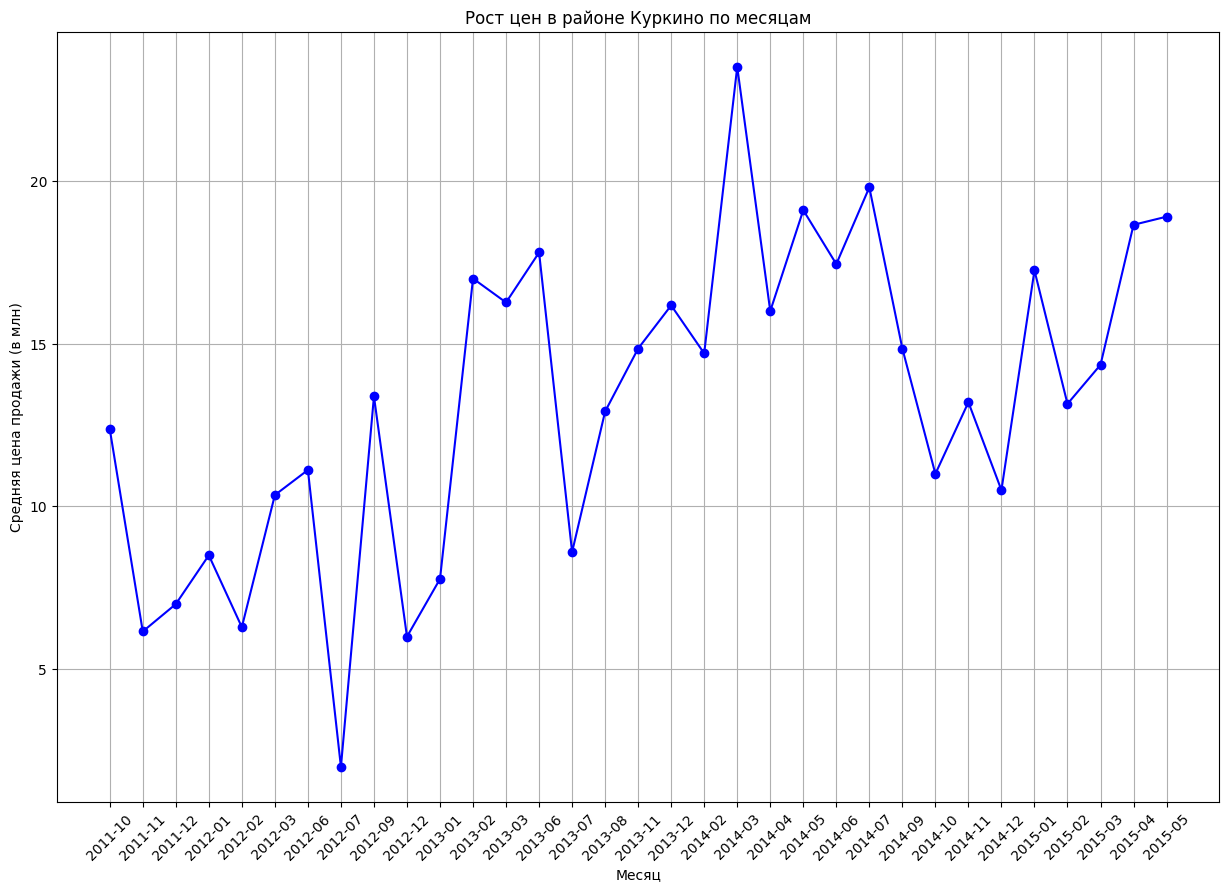

In [ ]:
# Фильтрация данных по району Куркино
kurkino_data = data[data['sub_area'] == 'Kurkino']

# Группировка данных по месяцам и расчет средней цены продажи
monthly_avg_price_kurkino = kurkino_data.groupby(kurkino_data['timestamp'].dt.to_period('M')).agg({'price_doc': 'mean'})

# Создание графика роста цен в районе Куркино по месяцам
plt.figure(figsize=(15, 10))
plt.plot(monthly_avg_price_kurkino.index.astype(str), monthly_avg_price_kurkino['price_doc'] / 1000000, marker='o', color='b')
plt.title('Рост цен в районе Куркино по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена продажи (в млн)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


   id   timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0   1  2011-08-20       43     27.0    4.0        NaN       NaN         NaN   
1   2  2011-08-23       34     19.0    3.0        NaN       NaN         NaN   
2   3  2011-08-27       43     29.0    2.0        NaN       NaN         NaN   
3   4  2011-09-01       89     50.0    9.0        NaN       NaN         NaN   
4   5  2011-09-05       77     77.0    4.0        NaN       NaN         NaN   

   num_room  kitch_sq  ...  cafe_count_5000_price_2500  \
0       NaN       NaN  ...                           9   
1       NaN       NaN  ...                          15   
2       NaN       NaN  ...                          10   
3       NaN       NaN  ...                          11   
4       NaN       NaN  ...                         319   

  cafe_count_5000_price_4000 cafe_count_5000_price_high  \
0                          4                          0   
1                          3                          0   

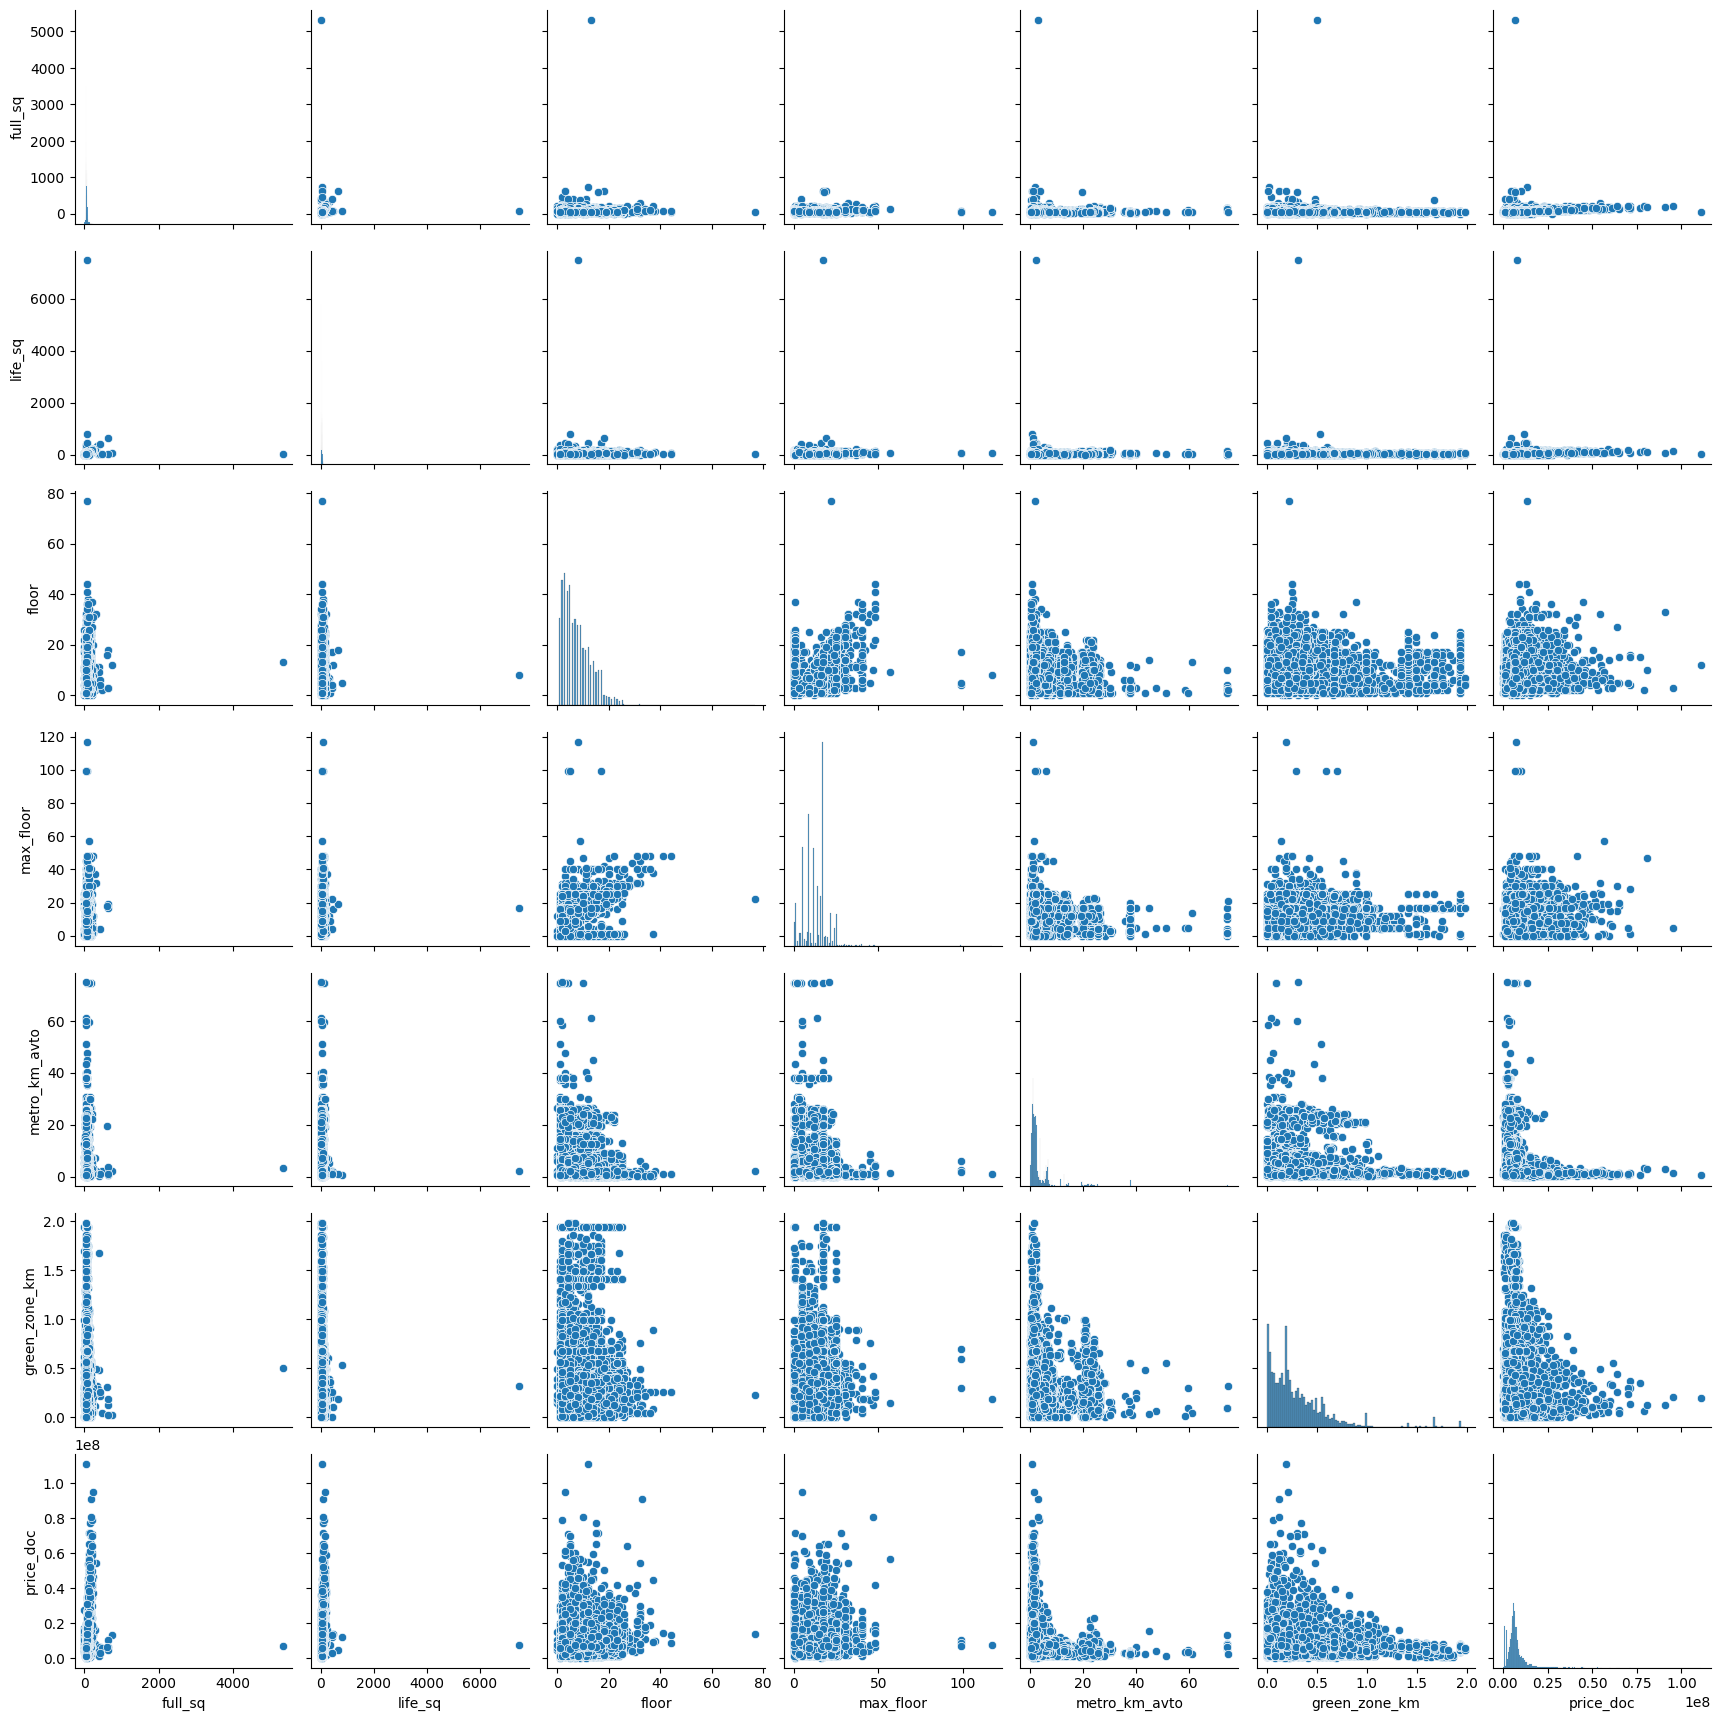

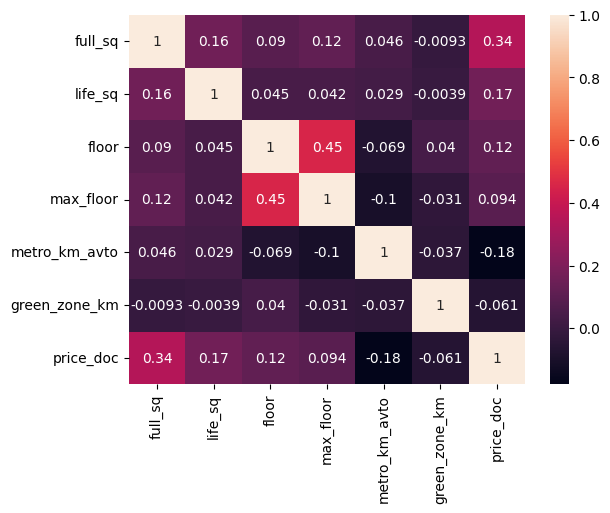

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('/content/drive/MyDrive/train.csv')
macro_data = pd.read_csv('/content/drive/MyDrive/macro.csv')

# Предварительный обзор данных
print(data.head())
print(data.info())
print(data.describe())

# Визуализация данных
sns.pairplot(data[['full_sq', 'life_sq', 'floor', 'max_floor', 'metro_km_avto', 'green_zone_km', 'price_doc']])
plt.show()

# Анализ корреляции
correlation_matrix = data[['full_sq', 'life_sq', 'floor', 'max_floor', 'metro_km_avto', 'green_zone_km', 'price_doc']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [ ]:
best_district = "Район с наилучшей производительностью и стабильностью"


In [ ]:
!pip install dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 14.9 MB/s eta 0:00:00


In [ ]:
import dash


In [ ]:
app = dash.Dash(__name__)


In [44]:
import dash
import dash_html_components as html

best_district = "Sample District"  # Здесь можно поместить фактическое имя лучшего района

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='Рекомендации по инвестициям в недвижимость'),

    html.Div(children='''
        На основании анализа данных, наилучший район для инвестиций: {}
    '''.format(best_district)),

    # Дополнительные компоненты интерфейса могут быть добавлены здесь
])

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [26]:
import pandas as pd

# Загрузка данных из файла CSV
file_path = '/content/drive/MyDrive/train.csv'
data = pd.read_csv(file_path)

# Предварительный просмотр загруженных данных
print(data.head())
print(data.info())

   id   timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0   1  2011-08-20       43     27.0    4.0        NaN       NaN         NaN   
1   2  2011-08-23       34     19.0    3.0        NaN       NaN         NaN   
2   3  2011-08-27       43     29.0    2.0        NaN       NaN         NaN   
3   4  2011-09-01       89     50.0    9.0        NaN       NaN         NaN   
4   5  2011-09-05       77     77.0    4.0        NaN       NaN         NaN   

   num_room  kitch_sq  ...  cafe_count_5000_price_2500  \
0       NaN       NaN  ...                           9   
1       NaN       NaN  ...                          15   
2       NaN       NaN  ...                          10   
3       NaN       NaN  ...                          11   
4       NaN       NaN  ...                         319   

  cafe_count_5000_price_4000 cafe_count_5000_price_high  \
0                          4                          0   
1                          3                          0   

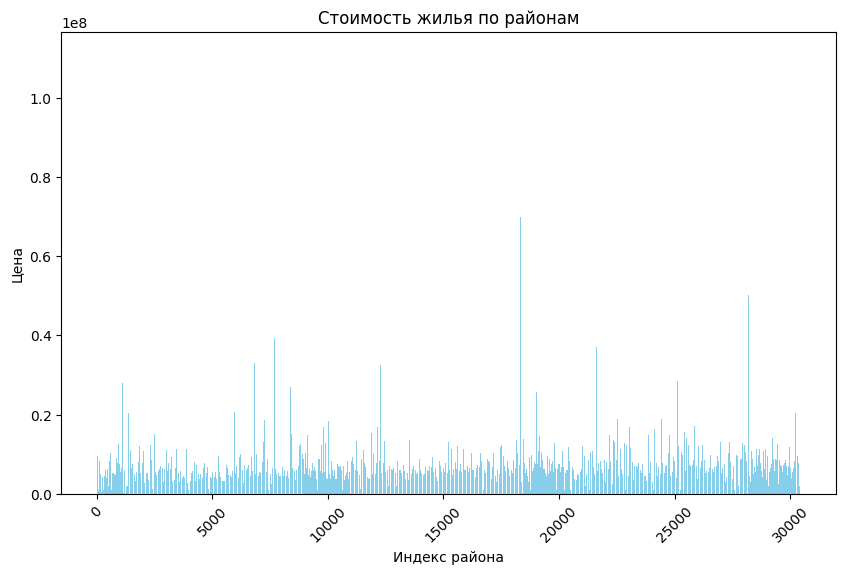

In [34]:
# Пример визуализации стоимости жилья по районам
plt.figure(figsize=(10, 6))
plt.bar(data.index, data['price_doc'], color='skyblue')  # Используйте индексы строк как x-координаты
plt.title('Стоимость жилья по районам')
plt.xlabel('Индекс района')  # Подставьте подходящий текст для оси x
plt.ylabel('Цена')
plt.xticks(rotation=45)  # Поверните подписи оси x для удобства чтения
plt.show()


In [57]:
import dash
import dash_html_components as html

best_district = "Арбат"  # Здесь можно поместить фактическое имя лучшего района

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='Рекомендации по инвестициям в недвижимость'),

    html.Div(children='''
        На основании анализа данных, наилучший район для инвестиций: {}
    '''.format(best_district)),

    # Дополнительные компоненты интерфейса могут быть добавлены здесь
])

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>